# Dataset iris
dataset that contains information about three types of iris flowers: Setosa, Versicolour, and Virginica. Here are the key details:

* **Features**: The dataset includes measurements of sepal length, sepal width, petal
length, and petal width for 150 iris flowers.
* **Classes**: Each flower belongs to one of the three classes mentioned above.
* **Use Case**: It’s widely used for evaluating classification methods and visualizations.
* **Linear Separability**: While one class is linearly separable from the other two, the latter two are not linearly separable from each other.

In [62]:
!pip install -q tfds-nightly tensorflow

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [64]:
# Carregar o conjunto de dados Iris
iris = load_iris()

# Converter para um DataFrame do pandas para facilitar a visualização
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Exibir as primeiras linhas do DataFrame
print(df.head())
print(df.shape)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
(150, 5)


In [65]:
x = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [66]:
# transformer in one hot encoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=3)
y_test_one_hot

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [67]:
classifier = Sequential()
classifier.add(Dense(units=4, activation='relu', input_dim=4))
classifier.add(Dense(units=4, activation='relu'))
# classifier 3 classes: Setosa, Versicolour, and Virginica
classifier.add(Dense(units=3, activation='softmax'))
# link loss function available https://keras.io/api/losses/
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
classifier.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

In [68]:
classifier.fit(X_train, y_train_one_hot, batch_size=10, epochs=1000)

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.3960 - loss: 1.0362
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3977 - loss: 1.0415 
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.3470 - loss: 1.0827  
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.3750 - loss: 1.0416 
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3518 - loss: 1.0554 
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.3512 - loss: 1.0473 
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.3744 - loss: 1.0308
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.3470 - loss: 1.0521 
Epoch 9/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.3731 - loss: 1.0369 
Epoch 10/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3387 - loss: 1.0444 
Epoch 11/1

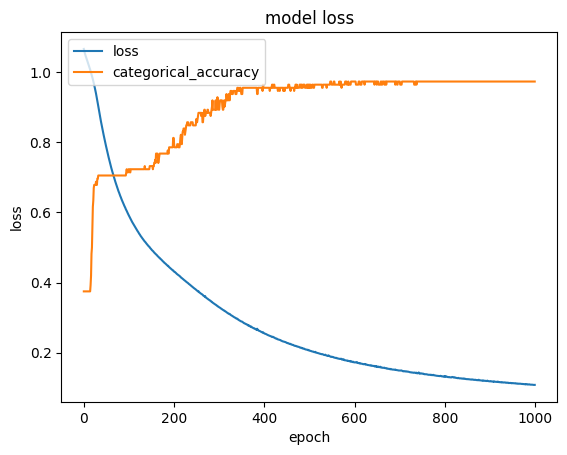

In [69]:
[44]
import matplotlib.pyplot as plt
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['categorical_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'categorical_accuracy'], loc='upper left')
plt.show()


# The Kullback-Leibler divergence (KL divergence)
Also known as relative entropy or I-divergence, is a statistical measure of how one probability distribution differs from another. Specifically, it quantifies the difference between two probability distributions, denoted as (P) and (Q)

In [70]:
classifier2 = Sequential()
classifier2.add(Dense(units=4, activation='relu', input_dim=4))
classifier2.add(Dense(units=4, activation='relu'))
# classifier 3 classes: Setosa, Versicolour, and Virginica
classifier2.add(Dense(units=3, activation='softmax'))
# using Kullback-Leibler divergence loss between y_true & y_pred.
classifier2.compile(optimizer='adam', loss='KLDivergence', metrics=['categorical_accuracy'])
classifier2.fit(X_train, y_train_one_hot, batch_size=10, epochs=1000)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.2640 - loss: 2.0029
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3230 - loss: 1.7428  
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2799 - loss: 1.6461     
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2682 - loss: 1.4909 
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2813 - loss: 1.5470 
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.3075 - loss: 1.3931 
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2469 - loss: 1.3991 
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2943 - loss: 1.2190 
Epoch 9/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3129 - loss: 1.2449 
Epoch 10/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3254 - loss: 1.1751 
Epoch 11/1000
12/1

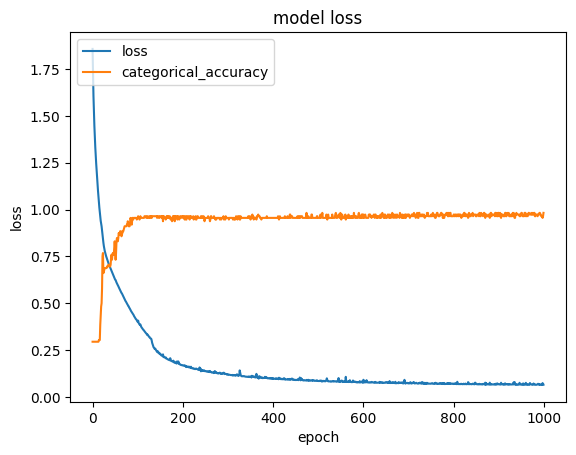

In [71]:
import matplotlib.pyplot as plt
plt.plot(classifier2.history.history['loss'])
plt.plot(classifier2.history.history['categorical_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'categorical_accuracy'], loc='upper left')
plt.show()

In [76]:
#save the model
classifier_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(classifier_json)
classifier.save('model.h5')

In [78]:
# load the model
from keras.models import model_from_json
filejson = open('model.json', 'r')
loaded_model_json = filejson.read()
filejson.close()
classifier3 = model_from_json(loaded_model_json)
classifier3.load_weights('model.h5')

In [83]:
result = classifier3.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [80]:
classifier3.evaluate(X_test, y_test_one_hot)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.9720 - loss: 0.1147  


[0.11236385256052017, 0.9736841917037964]

In [84]:
result = result > 0.5
result

array([[False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [88]:
# decode the one hot encode
y_test_one_hot
y_test_decode = np.argmax(y_test_one_hot, axis=1)
print(y_test_decode.shape)
print(y_test_decode)

# true/false for label 0 , 1 , 2  - Setosa, Versicolour, and Virginica.
y_result = np.argmax(result, axis=1)
print(y_result.shape)
print(y_result)


(38,)
[2 0 1 1 1 0 1 1 1 2 2 0 2 0 2 1 1 0 1 0 0 2 1 2 1 1 0 1 2 0 1 0 0 0 1 1 0
 1]
(38,)
[2 0 1 2 1 0 1 1 1 2 2 0 2 0 2 1 1 0 1 0 0 2 1 2 1 1 0 1 2 0 1 0 0 0 1 1 0
 1]


In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_decode, y_result)
cm

array([[13,  0,  0],
       [ 0, 16,  1],
       [ 0,  0,  8]])

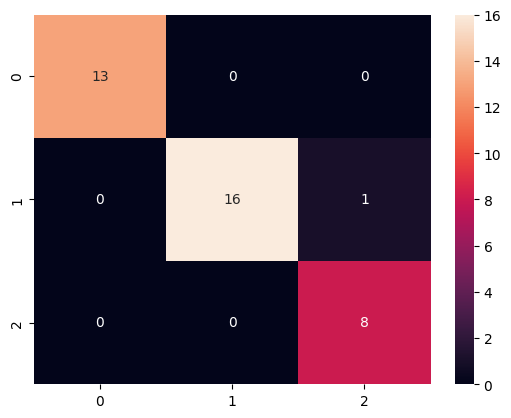

In [90]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.show()
